In [45]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
%matplotlib inline

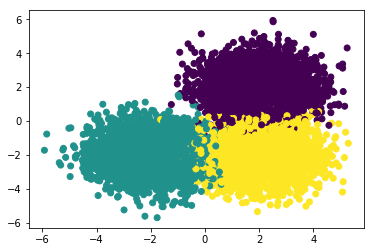

In [46]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

Start Mean-shift
Number of estimated clusters: 3


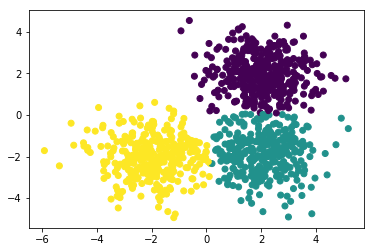

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [47]:
def mean_shift(X_train, y_train):
    print("Start Mean-shift")
    # Here we set the bandwidth. This function automatically derives a bandwidth
    # number based on an inspection of the distances among points in the data.
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

    # Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)

    # Extract cluster assignments for each data point.
    labels = ms.labels_

    # Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

    # Count our clusters.
    n_clusters_ = len(np.unique(labels))

    print("Number of estimated clusters: {}".format(n_clusters_))

    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')

    print(pd.crosstab(y_train,labels))
    
mean_shift(X_train, y_train)

Start spectral


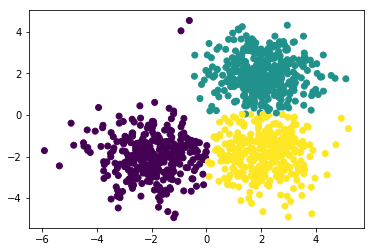

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        2  350   10
1      310    1    9
2        6    7  305


In [48]:
def spectral(X_train, y_train):
    print("Start spectral")
    # We know we're looking for three clusters.
    n_clusters=3

    # Declare and fit the model.
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(X_train)

    #Predicted clusters.
    predict=sc.fit_predict(X_train)

    #Graph results.
    plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,predict))
    
spectral(X_train, y_train)

Start affinity
Done
Estimated number of clusters: 93


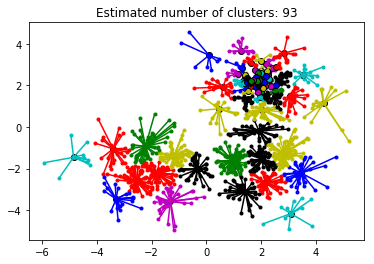

In [49]:
def affinity(X_train, y_train):
    print("Start affinity")
    # Declare the model and fit it in one statement.
    # Note that you can provide arguments to the model, but we didn't.
    af = AffinityPropagation().fit(X_train)
    print('Done')

    # Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = af.labels_

    print('Estimated number of clusters: {}'.format(n_clusters_))

    plt.figure(1)
    plt.clf()

    # Cycle through each cluster and graph them with a center point for the
    # exemplar and lines from the exemplar to each data point in the cluster.
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X_train[cluster_centers_indices[k]]
        plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
        plt.plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X_train[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: {}'.format(n_clusters_))
    plt.show()
    
affinity(X_train, y_train)

Start K-means


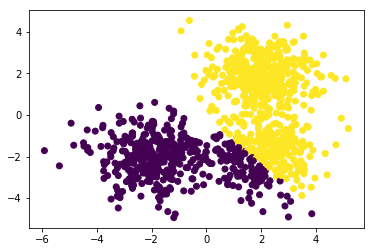

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0        0  318  116
1      362    2  202


In [50]:
def k_means(X_train, y_train):
    print("Start K-means")
    y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_train)
    
    # Plot the solution.
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
    plt.show()

    # Check the solution against the data.
    print('Comparing k-means clusters against the data:')
    print(pd.crosstab(y_pred, y_train))
    
k_means(X_train, y_train)

# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ($k$-means, mean shift, spectral clustering and affinity propagation) on each one.  Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups. 

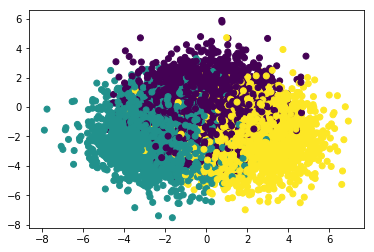

In [51]:
# The coordinates of the centers of our blobs.
centers = [[0, 0], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X_1, y_1 = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1.5,
    n_features=2,
    random_state=42)

plt.scatter(X_1[:, 0], X_1[:, 1], c=y_1)
plt.show()

#Divide into training and test sets.
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(
    X_1,
    y_1,
    test_size=0.9,
    random_state=42)

Start K-means


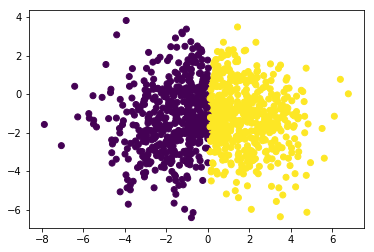

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0      186  284   25
1      176   36  293
Start Mean-shift
Number of estimated clusters: 1


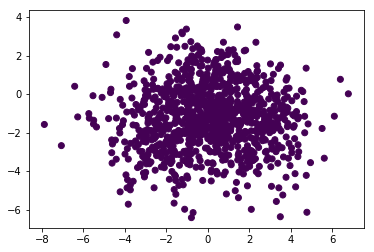

Comparing the assigned categories to the ones in the data:
col_0    0
row_0     
0      362
1      320
2      318
Start spectral


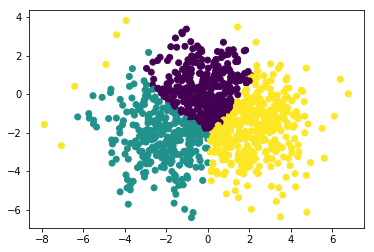

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      239   47   76
1       54  237   29
2       41   12  265
Start affinity
Done
Estimated number of clusters: 56


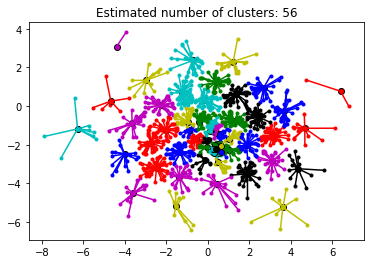

In [52]:
k_means(X_1_train, y_1_train)
mean_shift(X_1_train, y_1_train)
spectral(X_1_train, y_1_train)
affinity(X_1_train, y_1_train)

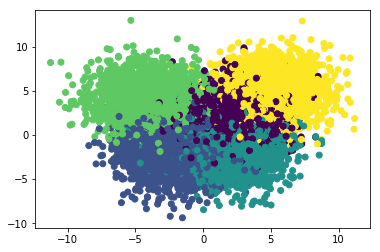

In [11]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2], [-4, 4], [5, 5]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X_2, y_2 = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=2,
    n_features=2,
    random_state=42)

plt.scatter(X_2[:, 0], X_2[:, 1], c=y_2)
plt.show()

#Divide into training and test sets.
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(
    X_2,
    y_2,
    test_size=0.9,
    random_state=42)

Start K-means


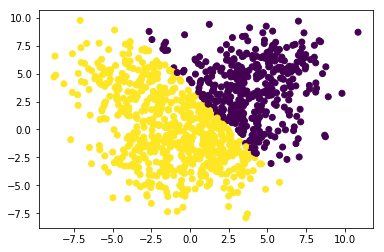

Comparing k-means clusters against the data:
col_0    0    1    2    3    4
row_0                         
0      137    1   36   17  197
1       84  202  155  170    1
Start Mean-shift
Number of estimated clusters: 1


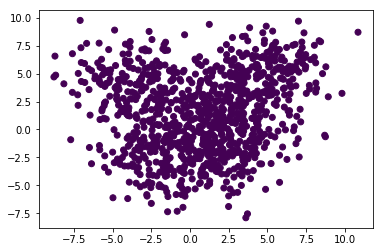

Comparing the assigned categories to the ones in the data:
col_0    0
row_0     
0      221
1      203
2      191
3      187
4      198
Start spectral


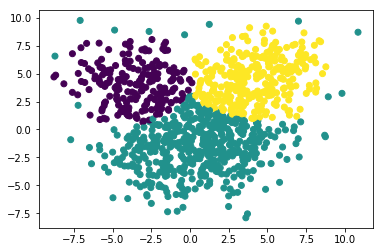

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       21   91  109
1       12  190    1
2        2  186    3
3      167   14    6
4        1   11  186
Start affinity
Done
Estimated number of clusters: 32


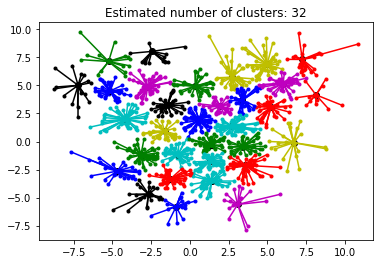

In [53]:
k_means(X_2_train, y_2_train)
mean_shift(X_2_train, y_2_train)
spectral(X_2_train, y_2_train)
affinity(X_2_train, y_2_train)

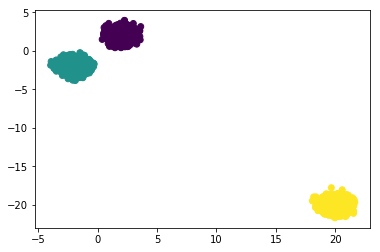

In [14]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [20, -20]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X_3, y_3 = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=.5,
    n_features=2,
    random_state=42)

plt.scatter(X_3[:, 0], X_3[:, 1], c=y_3)
plt.show()

#Divide into training and test sets.
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(
    X_3,
    y_3,
    test_size=0.9,
    random_state=42)

Start K-means


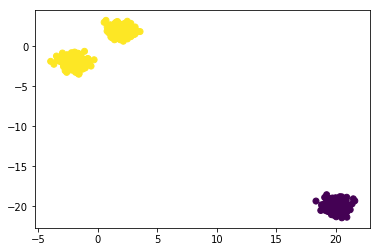

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0        0    0  318
1      362  320    0
Start Mean-shift
Number of estimated clusters: 3


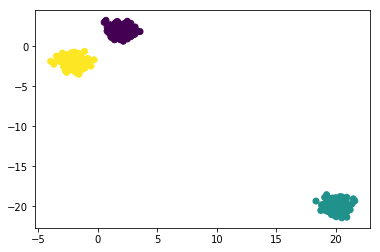

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      362    0    0
1        0    0  320
2        0  318    0
Start spectral


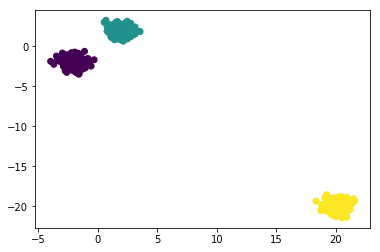

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0  362    0
1      320    0    0
2        0    0  318
Start affinity
Done
Estimated number of clusters: 409


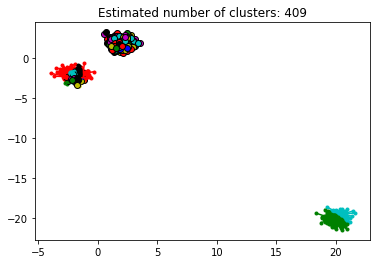

In [54]:
k_means(X_3_train, y_3_train)
mean_shift(X_3_train, y_3_train)
spectral(X_3_train, y_3_train)
affinity(X_3_train, y_3_train)

Spectral clustering seems to work the best with default settings without much tuning. It performed the best at clustering in each instance, though no clustering algorithm perfomed well with a lot of overlapping clusters. However, that is to be expected. 

Affinity clustering vastly overestimated cluster number in the final example with widely spread out blobs.